In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

C:\Users\USER\AppData\Local\Temp\ipykernel_33628\665549830.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sparse_signal[10] = np.random.randn(1) + 30


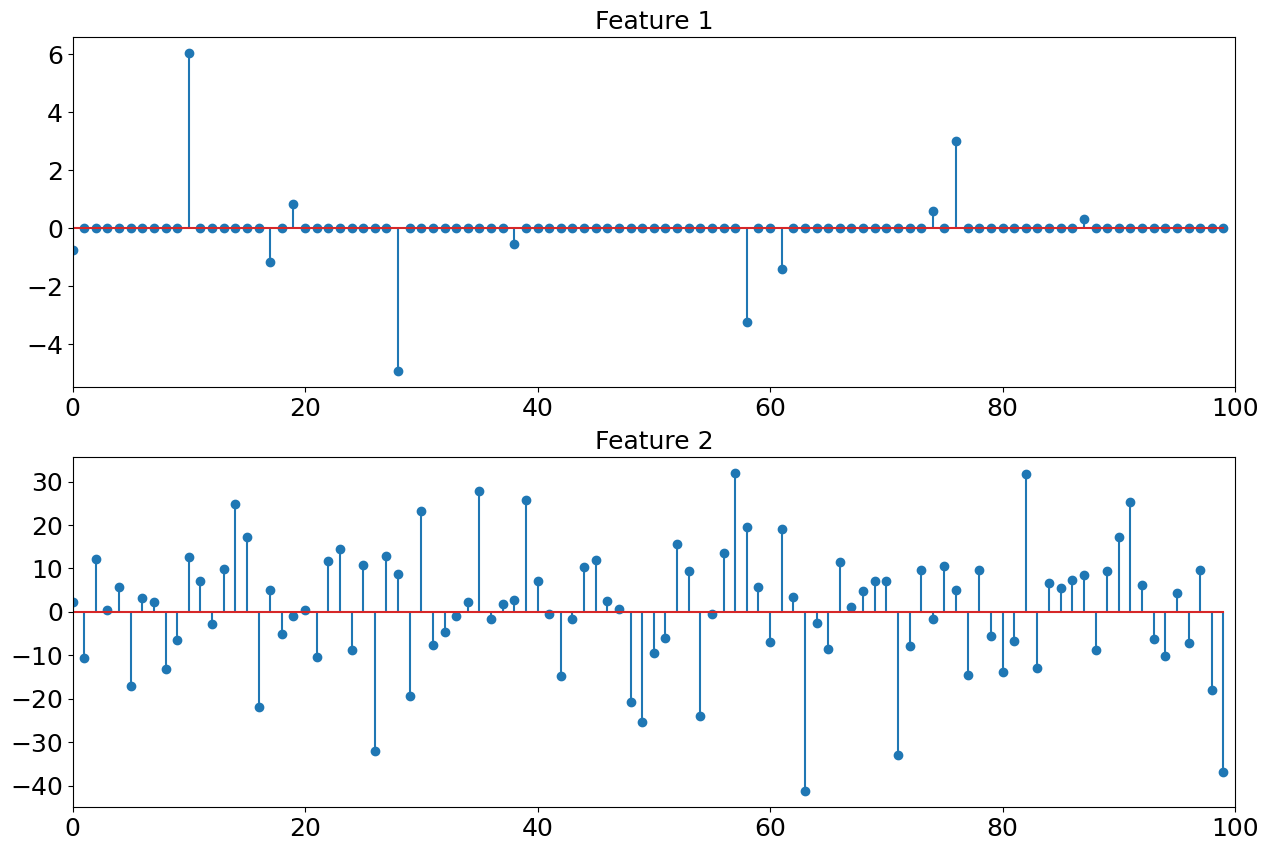

In [12]:

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Parameters
signal_length = 100       # Total length of the signal
num_nonzero = 10          # Number of non-zero elements in the signal
your_index_no = 220350    #my index number

# Generate sparse signal
sparse_signal = generate_signal(signal_length, num_nonzero)

sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30


sparse_signal = sparse_signal / 5

# Generate noise (Feature 2)
epsilon = np.random.normal(0, 15, signal_length)


# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(epsilon)

plt.show()


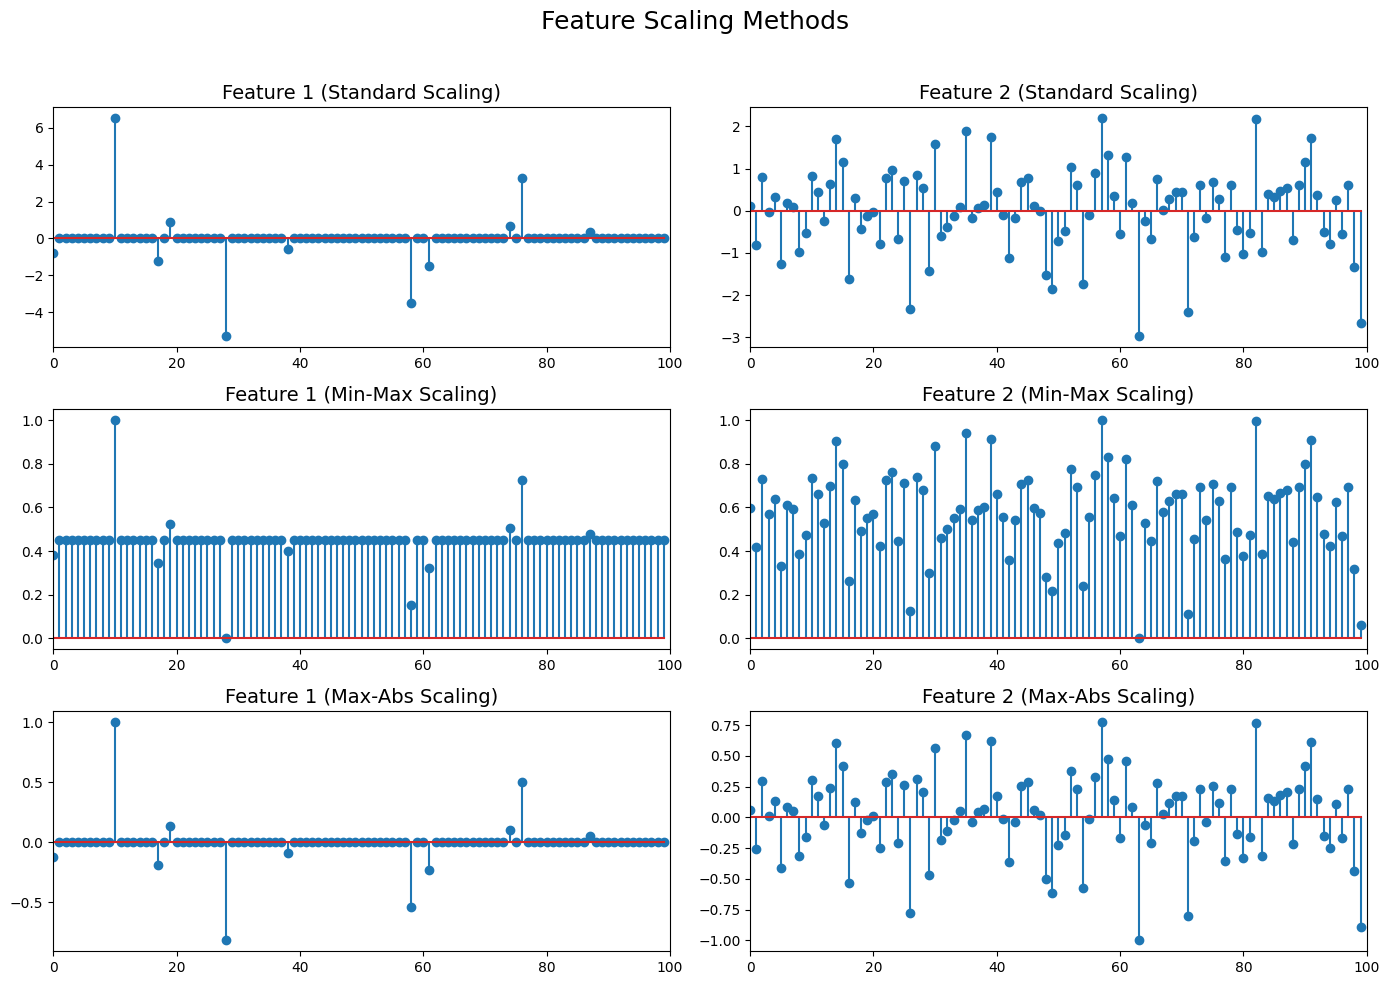

In [13]:
features = np.vstack((sparse_signal, epsilon)).T

# Define scalers
scalers = {
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler(),
    "Max-Abs Scaling": MaxAbsScaler()
}

# Apply scalers and plot results 
fig, axes = plt.subplots(len(scalers), 2, figsize=(14, 10))
fig.suptitle("Feature Scaling Methods", fontsize=18)

for row, (name, scaler) in enumerate(scalers.items()):
    scaled = scaler.fit_transform(features)

    # Plot Feature 1
    axes[row, 0].stem(scaled[:, 0])
    axes[row, 0].set_xlim(0, signal_length)
    axes[row, 0].set_title(f"Feature 1 ({name})", fontsize=14)

    # Plot Feature 2
    axes[row, 1].stem(scaled[:, 1])
    axes[row, 1].set_xlim(0, signal_length)
    axes[row, 1].set_title(f"Feature 2 ({name})", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


